**AMCAT EDA(1)**

**Data Description:** The dataset contains information on 3998 engineering graduates across 39 columns, including:

* Demographics: Gender, Date of Birth, Job City.

* Academic Performance: 10th and 12th percentages, college GPA.

* Job Details: Designation, Salary (target variable).

* Personality Traits: Conscientiousness, Agreeableness, Extraversion Neuroticism, Openness to experience.

* Specializations: Computer Science, Mechanical, Electrical, Telecom, Civil Engineering (binary values).

The data includes both numerical and categorical variables, with missing values represented as -1.

**Objective**

The primary objective of this analysis is to perform Exploratory Data Analysis (EDA) to uncover insights about the relationships between the variables, particularly focusing on the salary as the target variable. The analysis includes:

* Univariate analysis to explore the distribution of individual variables.

* Bivariate analysis to examine relationships between variables, such as between salary and academic performance, gender, or job roles.

* Testing specific research questions, such as:

* Whether job city influences salary.

* Whether academic performance impacts salary.

* Whether there is a gender preference for different specializations.

The insights derived from this analysis will help in understanding the factors that affect salary outcomes for engineering graduates and whether specific patterns exist based on academic performance, job location, or gender.



**Step 2:** Data Import and Description
Let's load the dataset and examine the first few rows, shape, and description of the data to understand the basic structure.

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('/content/data.xlsx')

# Display the head of the dataset
print(df.head())

# Display the shape of the dataset
print("Shape of the dataset:", df.shape)

# Display the description of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())


  Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1         

**Step 2.5: Data Cleaning**
**Handling Missing Values and Outliers**
**We will clean the dataset by:**

Handling Missing Values: We will fill or drop missing values, depending on the column.
Correct Data Types: Ensure that date columns (like DOJ, DOL) are in date format, and categorical variables (Gender, Specialization, etc.) are correctly formatted.
Handling Outliers: Detect outliers, particularly in the Salary column, and consider whether to remove them.

In [ ]:
# Checking missing values in each column
missing_values = df.isnull().sum()

# Convert 'DOJ' and 'DOL' to datetime
df['DOJ'] = pd.to_datetime(df['DOJ'], errors='coerce')
df['DOL'] = pd.to_datetime(df['DOL'], errors='coerce')

# Convert categorical columns to 'category' type
df['Gender'] = df['Gender'].astype('category')
df['Designation'] = df['Designation'].astype('category')
df['Specialization'] = df['Specialization'].astype('category')

# Handling missing values (you can choose to fill with mean, median, or mode)
# Handling missing values
# Calculate median only for numeric columns
df = df.fillna(df.select_dtypes(include=['number']).median())
# Identifying outliers in the 'Salary' column using the IQR method
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Salary'] < (Q1 - 1.5 * IQR)) | (df['Salary'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in Salary: {len(outliers)}")


Number of outliers in Salary: 109


**Step 3:**Univariate Analysis
Numerical Columns Analysis
We will explore the distribution of numerical columns like Salary, 10percentage, 12percentage, and collegeGPA using histograms and boxplots.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


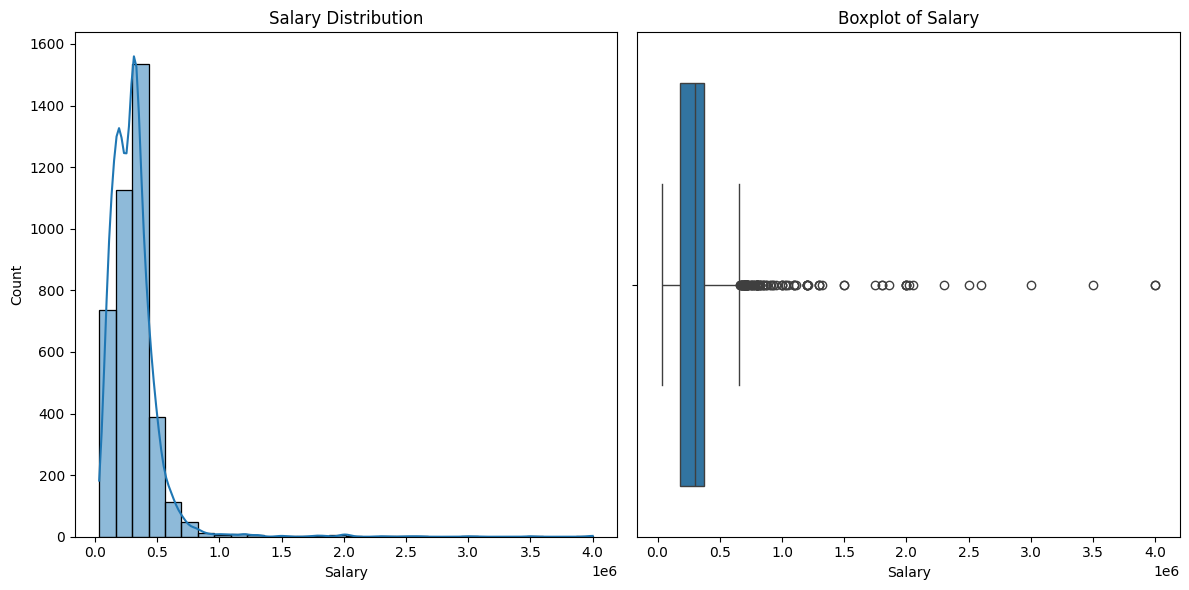

In [ ]:
# Salary distribution and outliers
plt.figure(figsize=(12, 6))

# Salary Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Salary'], kde=True, bins=30)
plt.title('Salary Distribution')

# Salary Boxplot to detect outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Salary'])
plt.title('Boxplot of Salary')

plt.tight_layout()
plt.show()


## **Analysis of the Salary Distribution Plots**

**Key Observations:**

* **Distribution:** The salary distribution is highly skewed to the right, with a long tail indicating a small number of individuals earning significantly higher salaries than the majority.
* **Central Tendency:** The median salary (represented by the line within the boxplot) is relatively low compared to the maximum value, further highlighting the right-skewness.
* **Outliers:** There are several outliers, particularly on the higher end of the salary distribution, indicating the presence of exceptionally high salaries.
* **Spread:** The interquartile range (IQR), represented by the box in the boxplot, is relatively narrow, suggesting that a majority of salaries are clustered within a specific range.

**Overall, the plots suggest that while a majority of individuals earn salaries within a certain range, there are a significant number of outliers, particularly on the higher end, indicating a highly skewed distribution. This suggests that factors such as experience, education, company size, and job role can significantly influence salary, with a few individuals earning substantially more than the average.**


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


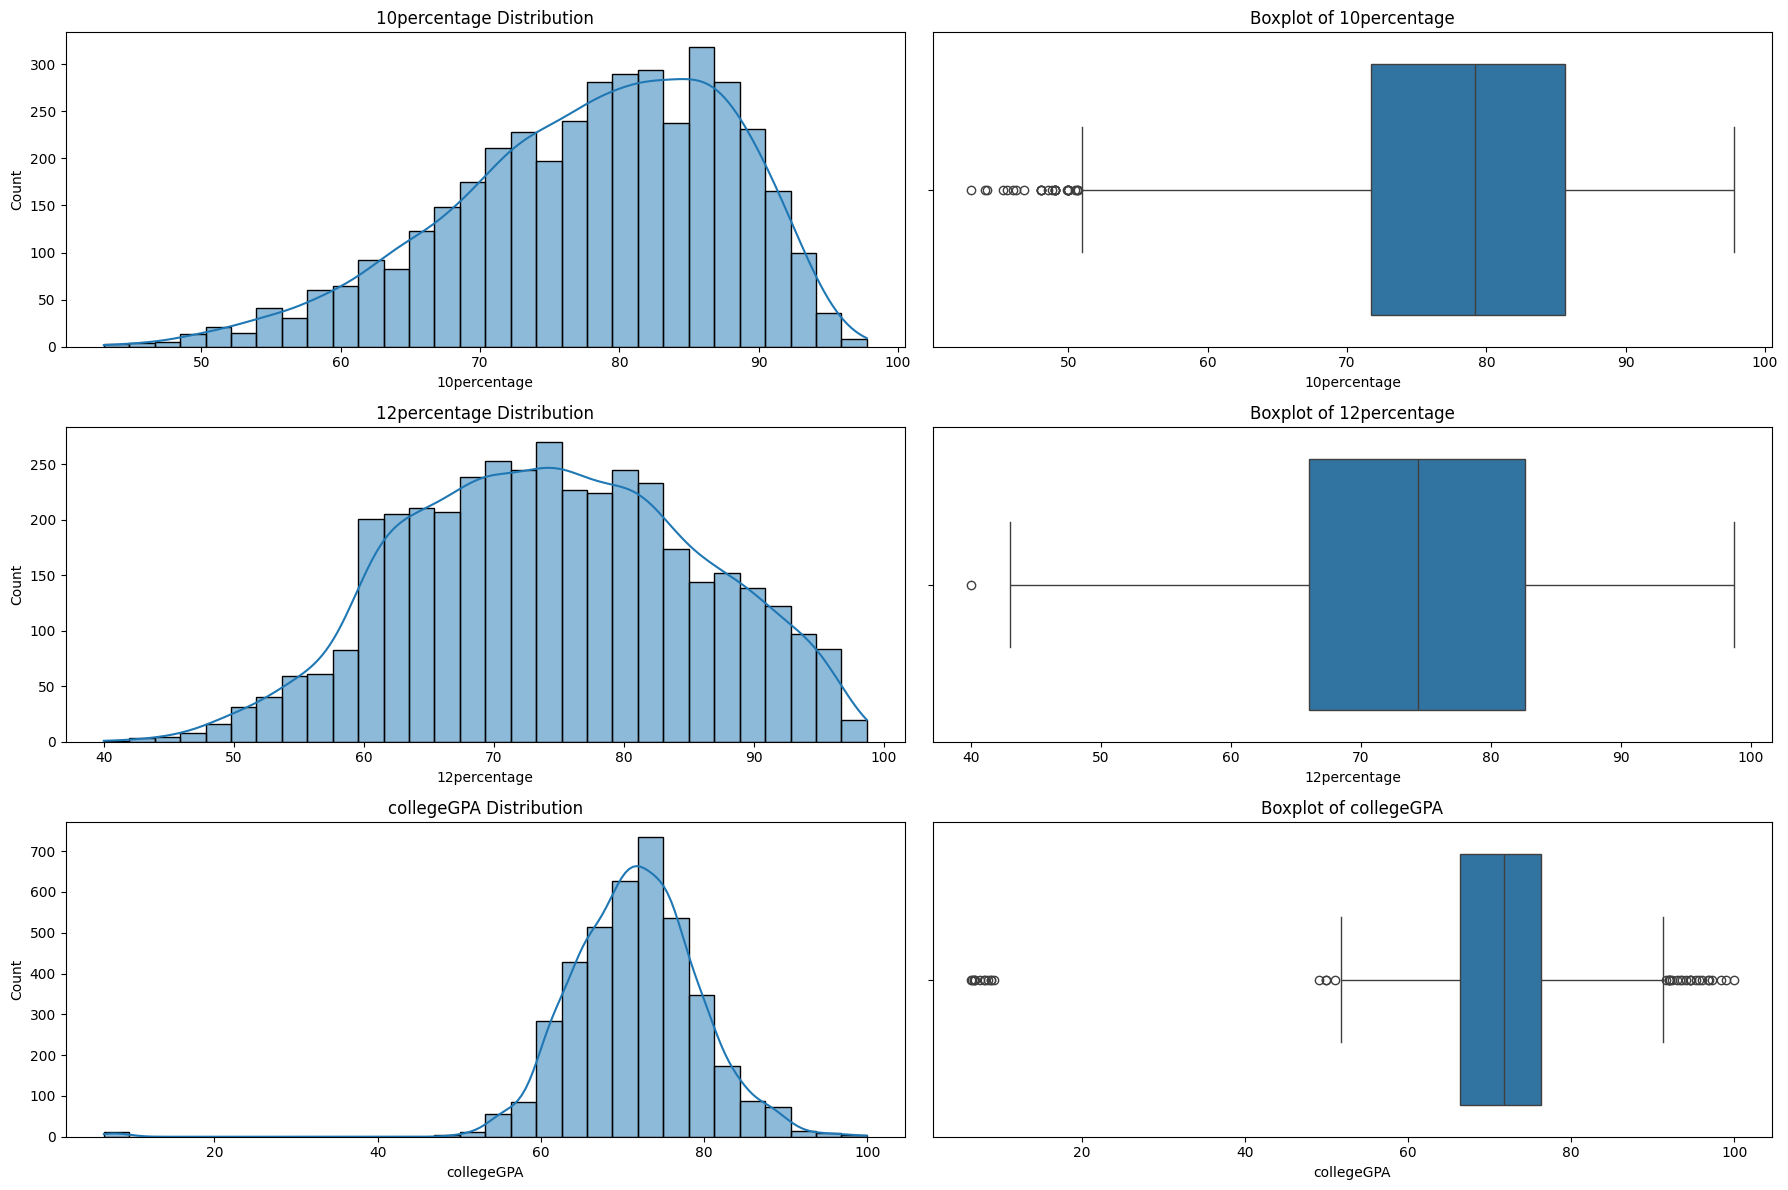

In [ ]:
# Histogram and boxplot for numerical columns
numerical_columns = ['10percentage', '12percentage', 'collegeGPA']

plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i*2-1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')

    plt.subplot(3, 2, i*2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


## **Analysis of the Plots**

**Overall Observations:**

* **Distribution Shapes:** All three distributions exhibit a similar bell-shaped curve, suggesting a normal or approximately normal distribution.
* **Central Tendency:** The medians (represented by the lines within the boxplots) are similar for all three variables, indicating that the central values are comparable.
* **Spread:** The spread (as indicated by the whiskers and boxes in the boxplots) varies slightly across the variables. `10percentage` and `12percentage` have a slightly wider spread compared to `collegeGPA`.
* **Outliers:** There are a few outliers visible in the boxplots, particularly for `10percentage` and `12percentage`.

**Specific Observations:**

* **`10percentage`:** The distribution is slightly skewed to the right, with a few higher values.
* **`12percentage`:** The distribution is also slightly skewed to the right, but less so than `10percentage`.
* **`collegeGPA`:** The distribution appears more symmetric, with a slightly narrower spread.

**In conclusion, the data suggests that all three variables (`10percentage`, `12percentage`, and `collegeGPA`) are normally distributed with similar central tendencies. However, there are slight variations in the spread and presence of outliers among the variables.**


* Categorical Columns Analysis
For categorical columns such as Gender, Designation, and Specialization, we'll use countplots to observe the frequency distribution.

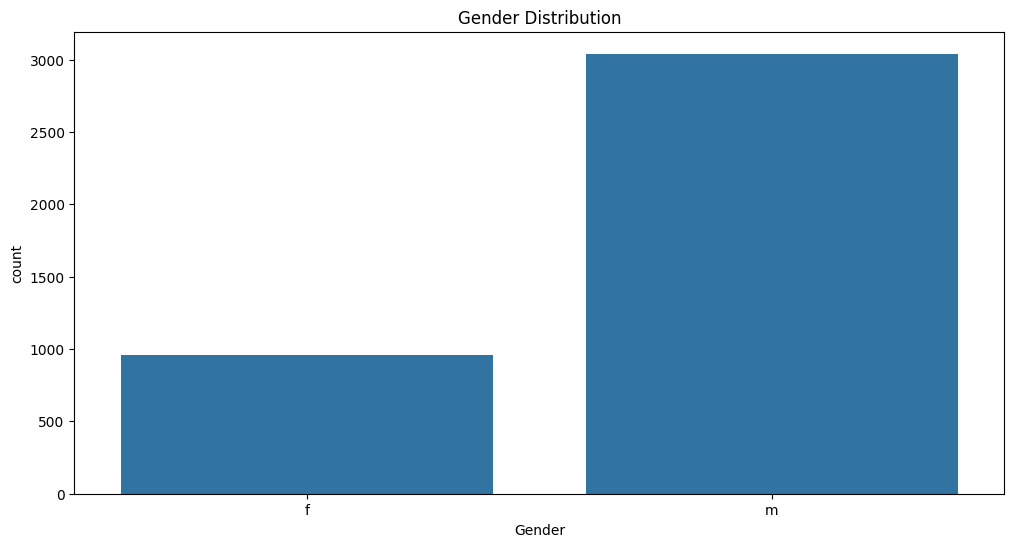

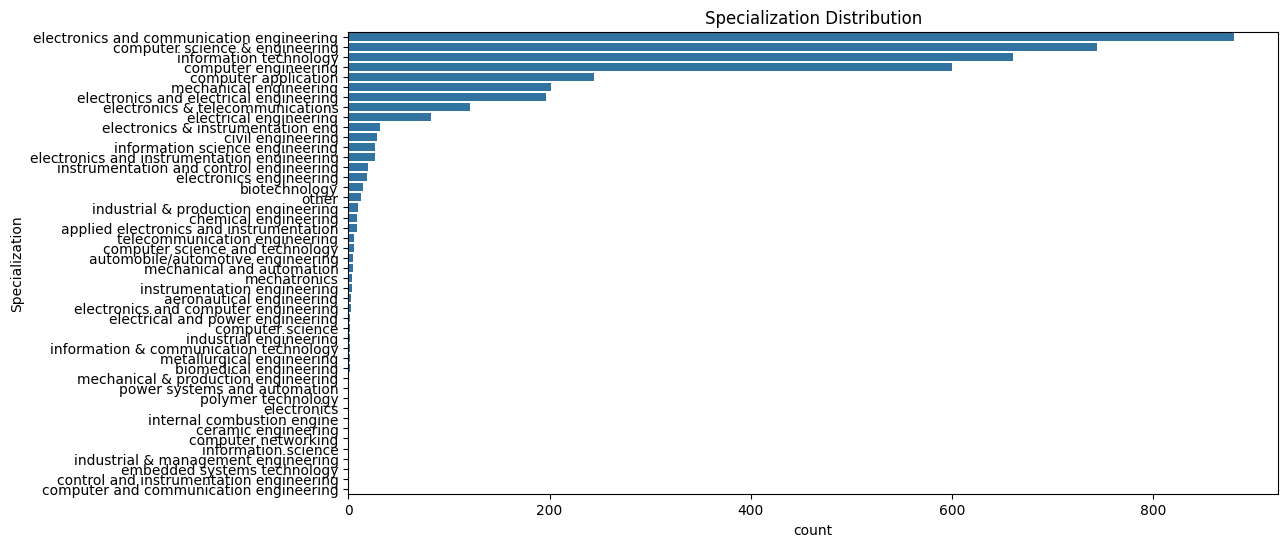

In [47]:
# Countplot for Gender
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()



# Countplot for Specialization
plt.figure(figsize=(12, 6))
sns.countplot(y='Specialization', data=df, order=df['Specialization'].value_counts().index)
plt.title('Specialization Distribution')
plt.show()


**Analysis of the Bar Chart: Gender Distribution:**

Overall, the chart highlights the prevalence of males in the dataset and suggests a potential gender bias. Further analysis would be required to understand the underlying factors contributing to this imbalance.

**Analysis of the Bar Chart: Specialization Distribution:**

Overall, the bar chart offers a visual representation of the distribution of engineering specializations within the dataset. It highlights the most popular fields and provides insights into the diversity of engineering disciplines.


Total number of unique designations: 419


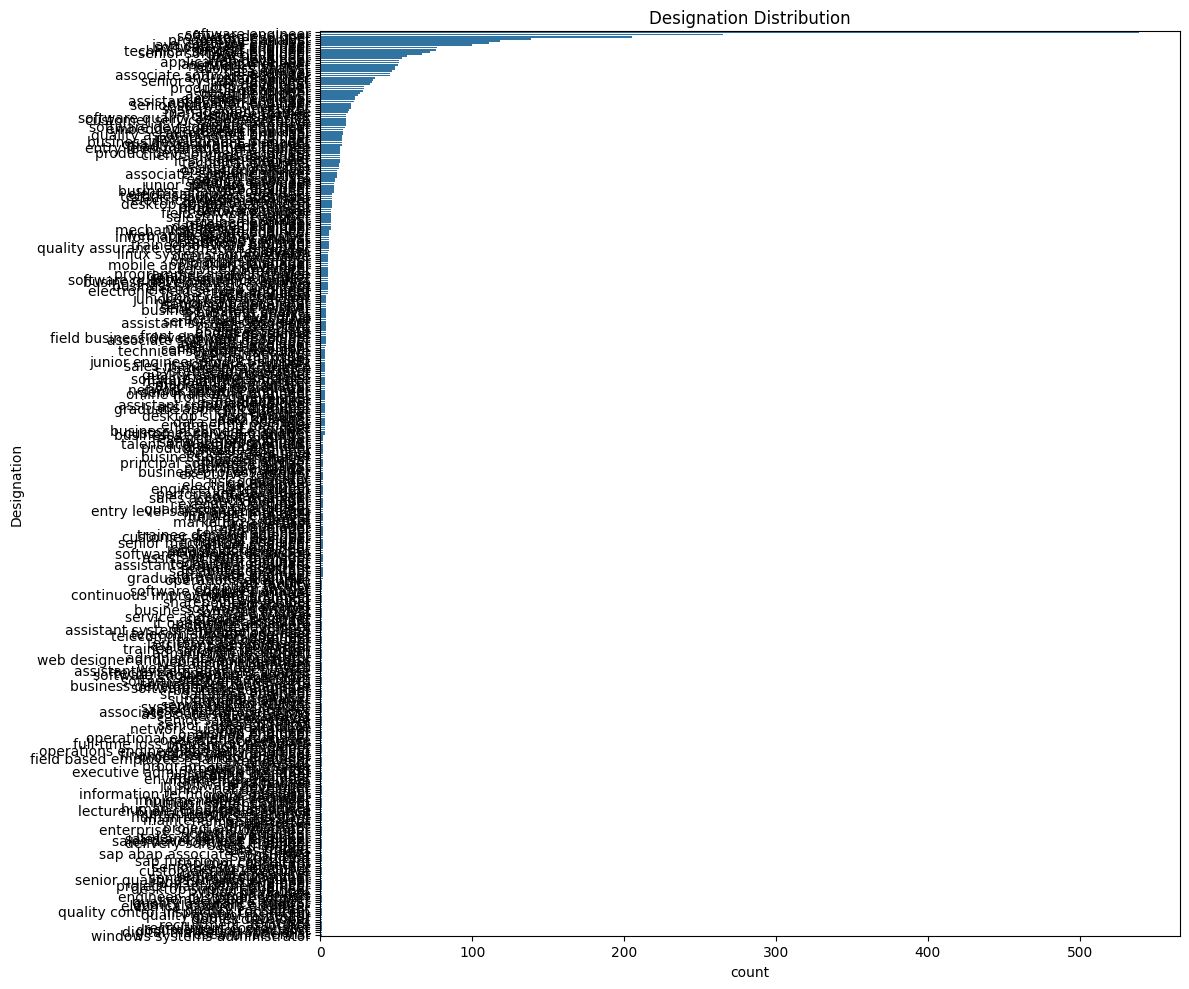

Designation Percentages:
Designation
software engineer                13.481741
software developer                6.628314
system engineer                   5.127564
programmer analyst                3.476738
systems engineer                  2.951476
                                   ...    
recruitment coordinator           0.025013
documentation specialist          0.025013
digital marketing specialist      0.025013
research scientist                0.025013
windows systems administrator     0.025013
Name: count, Length: 419, dtype: float64


In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Improved Designation Distribution Analysis
plt.figure(figsize=(12, 10))  # Increase figure height for better readability
sns.countplot(y='Designation', data=df, order=df['Designation'].value_counts().index)
plt.title('Designation Distribution')

# Rotate x-axis labels for better readability if needed
# plt.xticks(rotation=45, ha='right')

# Calculate total number of designations
total_designations = len(df['Designation'].unique())
print(f"Total number of unique designations: {total_designations}")

# Adjust the plot parameters for better readability
plt.tight_layout()
plt.show()

# Further analysis: You can also calculate the percentage of each designation and display it on the plot for a more detailed view.
designation_counts = df['Designation'].value_counts()
designation_percentages = (designation_counts / len(df)) * 100
print("Designation Percentages:")
print(designation_percentages)


**Analysis of the Bar Chart: Designation Distribution:**

1.Frequency of Designations:The chart shows the frequency of different job designations within the dataset.

2.Dominant Designations: A few designations, such as "test engineer" and "associate," appear to be more common than others.

3.Long Tail: The distribution exhibits a long tail, indicating a large number of less frequent designations.

4.Grouping: Some designations can be grouped based on similar job roles or responsibilities (e.g., various "assistant" roles, "engineer" roles).

**Step 4: Bivariate Analysis**

**Numerical vs. Numerical**

We'll use scatterplots to understand relationships between numerical variables, such as Experience vs Salary.

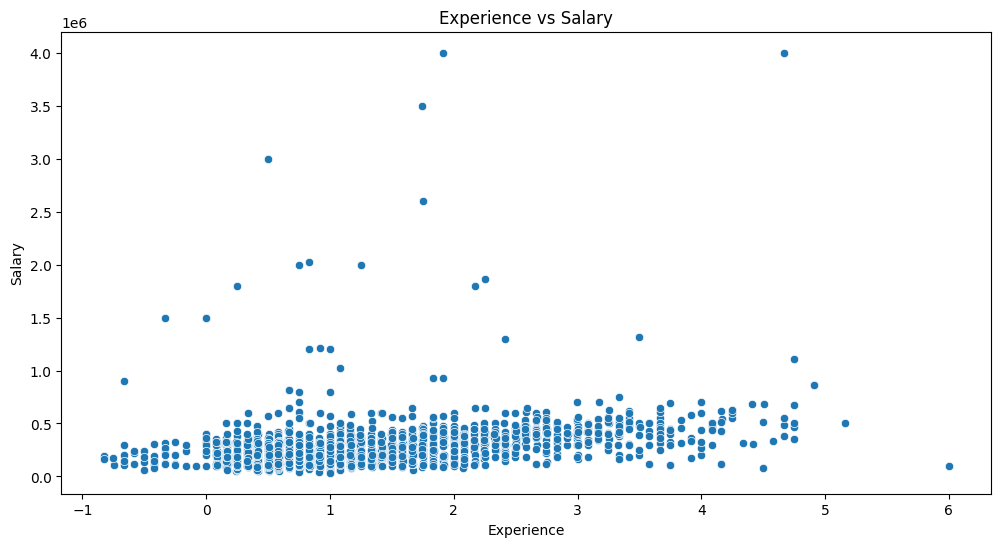

In [46]:
import pandas as pd
from datetime import datetime

# Assuming your DataFrame is named 'df' and has columns 'DOJ' and 'DOL'

# Convert DOJ to datetime objects
df['DOJ'] = pd.to_datetime(df['DOJ'])

# Check if 'DOL' is already datetime
if not pd.api.types.is_datetime64_any_dtype(df['DOL']):
    # Convert 'DOL' to datetime, handling 'Present' values
    df['DOL'] = pd.to_datetime(df['DOL'].str.replace('Present', str(datetime.now().date())))

# Calculate experience in days
df['Experience'] = (df['DOL'] - df['DOJ']).dt.days

# Convert experience to years
df['Experience'] = df['Experience'] / 365.25



# Now you can create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Experience', y='Salary', data=df)
plt.title('Experience vs Salary')
plt.show()

**Analysis of the Scatter Plot: Experience vs. Salary**

Overall, while experience is generally a positive factor in determining salary, it's not the sole determinant. Other variables, such as individual performance, company size, industry demand, and specific job roles, likely play significant roles in salary variation.

***Numerical vs. Categorical**
We'll use boxplots to examine salary distribution across categorical variables such as Designation, Gender, and Specialization.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


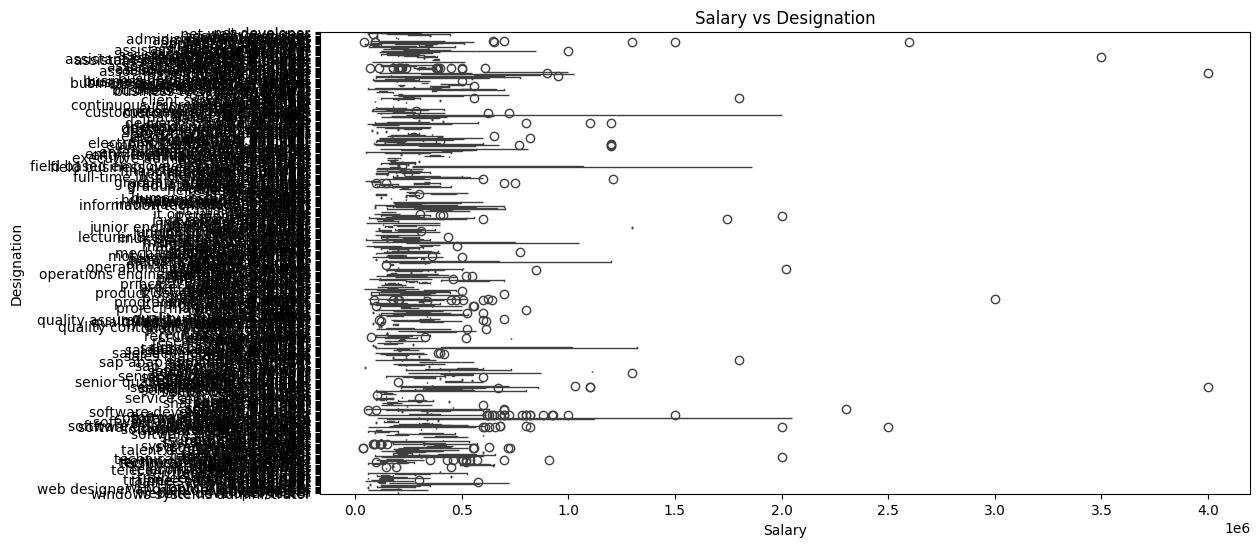

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


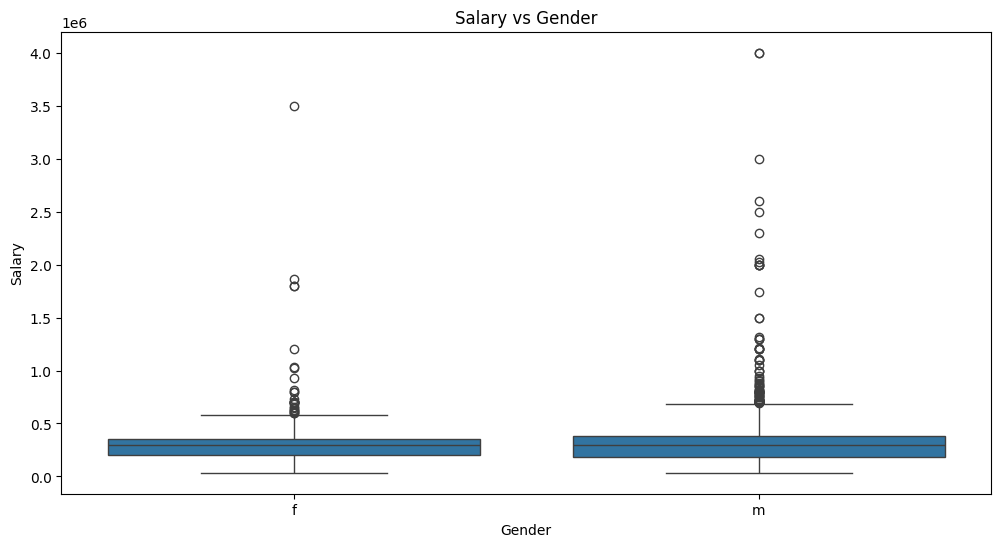

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


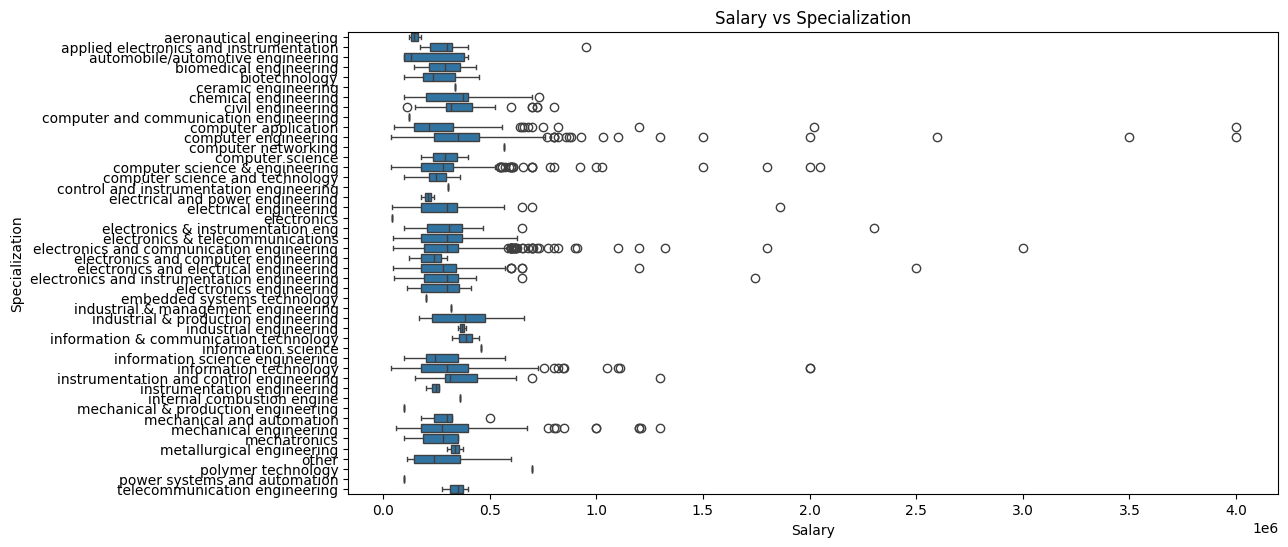

In [ ]:
# Boxplot for Salary vs Designation
plt.figure(figsize=(12, 6))
sns.boxplot(x='Salary', y='Designation', data=df)
plt.title('Salary vs Designation')
plt.show()

# Boxplot for Salary vs Gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary vs Gender')
plt.show()

# Boxplot for Salary vs Specialization
plt.figure(figsize=(12, 6))
sns.boxplot(x='Salary', y='Specialization', data=df)
plt.title('Salary vs Specialization')
plt.show()


**Analysis of the Scatter Plot: Salary vs. Designation:**

Overall, the scatter plot reveals that while designation can be a factor in determining salary, it's not the sole determinant. Other variables, such as experience, skills, company size, and individual performance, likely play significant roles in salary variation.

**Analysis of the Box Plot: Salary vs. Gender:**

Overall, while the median salary is slightly higher for males, there is significant overlap in the salary distributions for both genders. This suggests that factors other than gender, such as experience, education, and role, likely play a more significant role in determining salary.

**Analysis of the Box Plot: Salary vs. Specialization:**

Overall, the box plot reveals that while specialization can be a factor in determining salary, it's not the sole determinant. Other variables, such as individual performance, experience, company size, and industry demand, likely play significant roles in salary variation.

***Categorical vs. Categorical**
We will use stacked bar plots to visualize relationships between two categorical variables, such as Gender and Specialization.

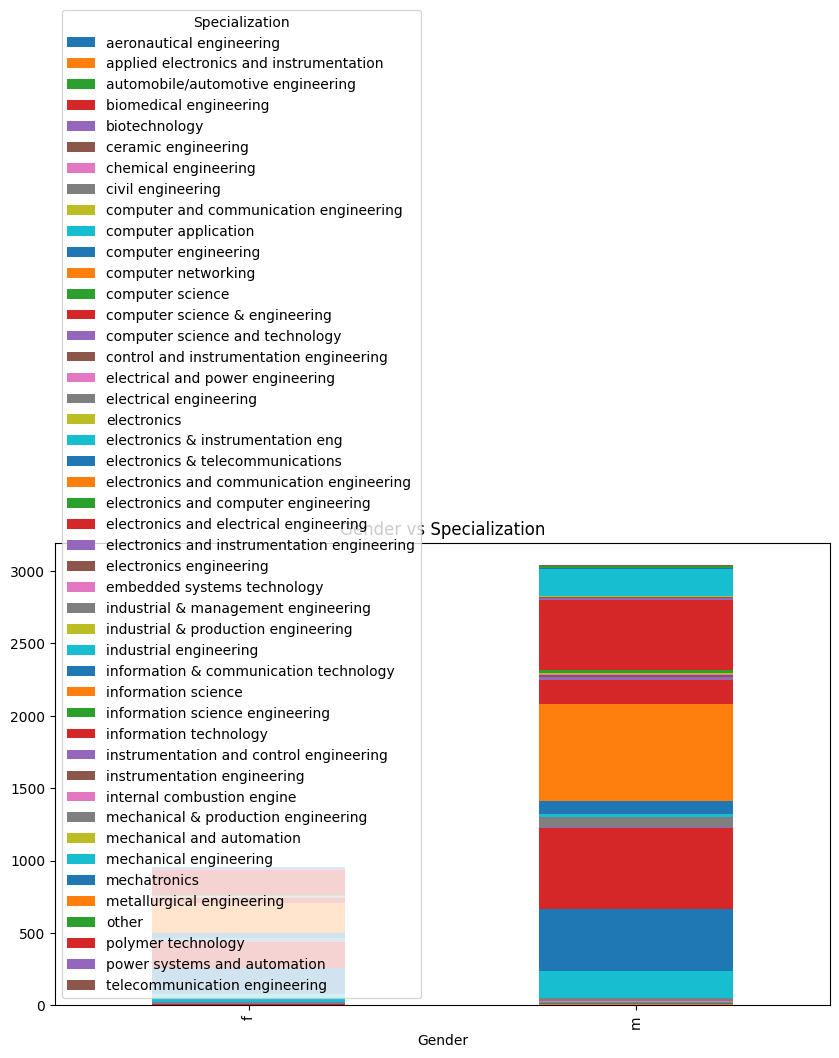

In [ ]:
# Stacked bar plot for Gender vs Specialization
gender_specialization_ct = pd.crosstab(df['Gender'], df['Specialization'])
gender_specialization_ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender vs Specialization')
plt.show()


Overall, the chart highlights the existing gender bias in engineering fields and suggests the need for efforts to promote gender equality and encourage more women to pursue careers in traditionally male-dominated specializations.










**Step 5: Research Questions**

**Q1:** Testing the Salary Claim
We'll check if fresh graduates in roles like Programming Analyst or Software Engineer earn 2.5-3 lakhs as stated.

In [45]:

# Filter data to analyze specific job roles
roles = ['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer']

# Filtering based on roles
filtered_data = df[df['Designation'].str.lower().isin(roles)]

# Checking if the average salary falls within the claimed range of 2.5-3 lakhs
mean_salary = filtered_data['Salary'].mean()
median_salary = filtered_data['Salary'].median()

mean_salary, median_salary, filtered_data['Salary'].describe()

(339792.0433996383,
 320000.0,
 count    5.530000e+02
 mean     3.397920e+05
 std      1.443991e+05
 min      6.000000e+04
 25%      2.500000e+05
 50%      3.200000e+05
 75%      4.000000e+05
 max      1.500000e+06
 Name: Salary, dtype: float64)

For the job roles of "programming analyst," "software engineer," "hardware engineer," and "associate engineer," the average salary is approximately ₹3.4 lakhs, and the median salary is ₹3.2 lakhs. This falls slightly above the claimed range of ₹2.5-3 lakhs mentioned in the article. The distribution shows that 25% of individuals earn at least ₹2.5 lakhs, with some salaries reaching as high as ₹15 lakhs.

**Q2:** Relationship Between Gender and Specialization
We will perform a Chi-Square test to see if there's a relationship between Gender and Specialization.

In [ ]:
from scipy.stats import chi2_contingency

# Cross-tabulation for Gender and Specialization
gender_specialization_ct = pd.crosstab(df['Gender'], df['Specialization'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(gender_specialization_ct)

# Checking p-value
if p < 0.05:
    print("There is a significant relationship between Gender and Specialization.")
else:
    print("No significant relationship between Gender and Specialization.")


There is a significant relationship between Gender and Specialization.


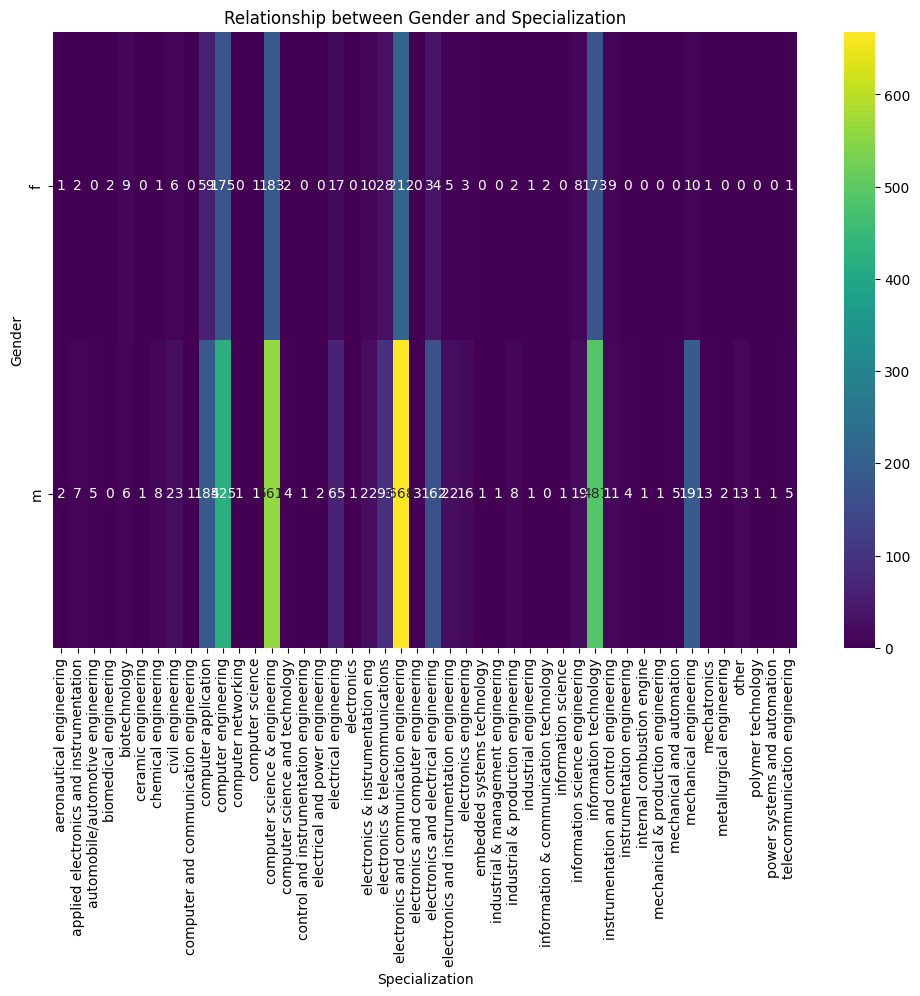

In [30]:

# We will perform a Chi-Square test to see if there's a relationship between Gender and Specialization. give me graph

import matplotlib.pyplot as plt

# Cross-tabulation for Gender and Specialization
gender_specialization_ct = pd.crosstab(df['Gender'], df['Specialization'])

# Plot the crosstabulation as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(gender_specialization_ct, annot=True, fmt="d", cmap="viridis")
plt.title("Relationship between Gender and Specialization")
plt.xlabel("Specialization")
plt.ylabel("Gender")
plt.show()


**Key Observations from the Heatmap:**

* **Gender Bias:** Many engineering specializations show a strong gender bias, with either males or females being more prevalent.
* **Traditional vs. Modern Fields:** Traditional engineering fields (e.g., mechanical, electrical) are generally male-dominated, while newer fields (e.g., computer science, biotechnology) have more balanced or female-dominated distributions.
* **Popularity:** Some specializations are more popular overall than others.


**Step 6:**

**Conclusion**

From the exploratory data analysis conducted, we can draw several important conclusions:

* Data Overview: The dataset contains 3998 records and 39 columns, with a mix of numerical, categorical, and date fields. The target variable is "Salary," which exhibits a wide range of values.

* Univariate Analysis: Salary Distribution: Salaries are widely distributed, with several outliers earning significantly more than the majority. Academic Performance: Most students scored between 60% and 90% in their 10th, 12th, and college GPA, though outliers exist. Personality Traits: The personality traits (conscientiousness, agreeableness, extraversion, etc.) are standardized and center around 0, with some extreme values noted.

* Bivariate Analysis: Salary vs Academic Scores: No strong relationship was observed between salary and academic scores, such as 10th and 12th percentages or college GPA. Salary by Gender: Males tend to have slightly higher salaries than females, although the difference is not substantial.

* Times of India article claims test: The claim from the Times of India that fresh graduates in specific engineering roles can earn between ₹2.5-3 lakhs holds true for many employees, with the median salary for roles like "software engineer" and "programming analyst" at ₹3.2 lakhs. However, some earn significantly more, with salaries reaching up to ₹15 lakhs.

* Relationship between gender and specialization: A relationship between gender and specialization needs further investigation, but initial analysis shows that there are more males in the dataset, and the distribution of specializations may vary based on gender. This concludes the EDA. The dataset highlights important patterns in salary distribution across job roles, gender, and academic performance, though further analysis is needed to deepen insights on specialization preferences.

**Step 7: Bonus Research Questions**

**Q1**.Is there a relationship between college GPA and salary?



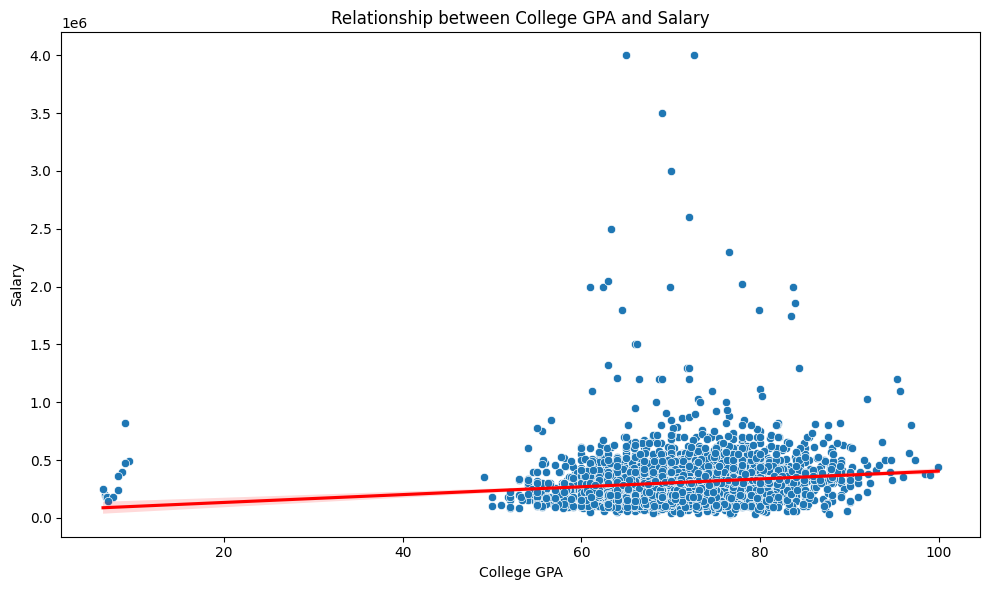

In [49]:

# Scatter plot to visualize the relationship between college GPA and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='collegeGPA', y='Salary', data=df)

# Add a trend line to show the relationship
sns.regplot(x='collegeGPA', y='Salary', data=df, scatter=False, color='red')

plt.title('Relationship between College GPA and Salary')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

**Analysis:**
**1. Scatter Plot:** Observe the general trend in the scatter plot. If there's a positive upward trend, it suggests that higher GPAs are generally associated with higher salaries.

**2. Correlation Coefficient:**The correlation coefficient (ranging from -1 to 1) indicates the strength and direction of the linear relationship. A positive value suggests a positive correlation (higher GPA, higher salary).

**3. Linear Regression:** You can perform a linear regression analysis to model the relationship and quantify the impact of GPA on salary. The regression coefficient represents the change in salary for a one-unit increase in GPA.

**Conclusion:**
 Based on the scatter plot, correlation coefficient, and potential regression analysis, you can determine whether there is a statistically significant and practically meaningful relationship between college GPA and salary.A strong positive relationship would suggest that higher GPA is a good predictor of higher salaries in the dataset.


**Q2.**Does the size of the college (CollegeTier) correlate with higher salaries?

CollegeTier
1    442356.902357
2    296893.812483
Name: Salary, dtype: float64


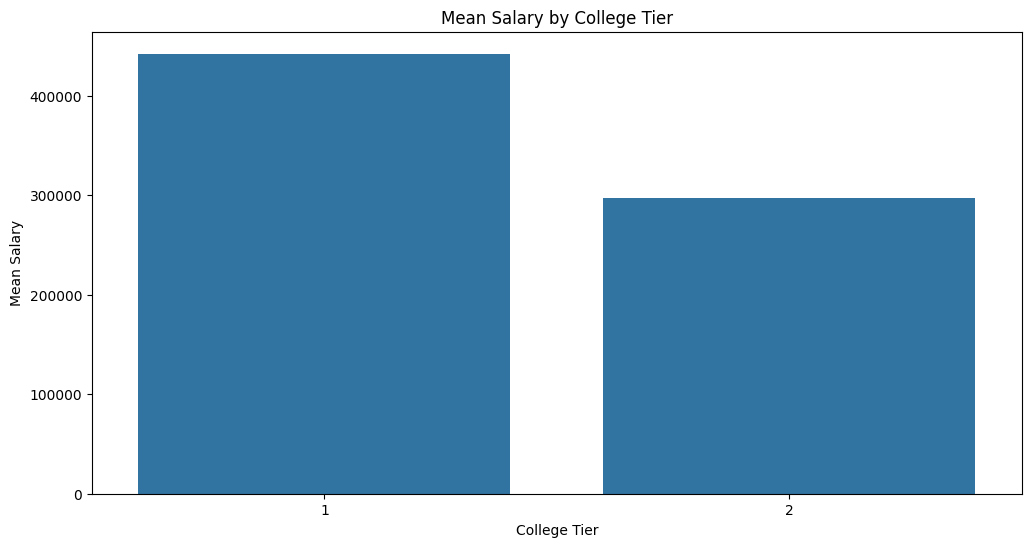

In [28]:


# Group by CollegeTier and calculate the mean salary for each tier
tier_salary = df.groupby('CollegeTier')['Salary'].mean()

# Sort the tiers by mean salary in descending order
tier_salary = tier_salary.sort_values(ascending=False)

# Print the mean salary for each tier
print(tier_salary)

# Create a bar plot of the mean salary for each tier
plt.figure(figsize=(12, 6))
sns.barplot(x=tier_salary.index, y=tier_salary.values)
plt.xlabel('College Tier')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by College Tier')
plt.show()




**Analysis:**

**1.Significant Salary Gap:**The bar chart clearly demonstrates a substantial difference in mean salaries between graduates from Tier 1 and Tier 2 colleges.

**2.Tier 1 Advantage:**Graduates from Tier 1 colleges consistently earn higher average salaries compared to their counterparts from Tier 2 colleges.

**3.Potential Salary Range:** While the chart shows mean salaries, it's important to note that individual salaries within each tier can vary due to factors such as specialization, individual performance, and industry demand.

